In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

from utils import data_preprocessing_util as dpu
from utils import classification_util as cu

from MLP import MLP
from nn_framework import NNFramework

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Preprocessing

In [113]:
data_path = r'/home/david/TU/ML/ml_ss23_group13/Ex2/data/breast-cancer-diagnostic.shuf.lrn.csv'
df = pd.read_csv(data_path)

In [114]:
nn = NNFramework()
nn.fit_encoder(df=df, cols_to_encode=df.columns.difference(['age', 'hours_sitting']))
df_encoded = nn.encode_dataset(df)

# Parameter experiments

## Running experiments

Define parameters:

In [115]:
random_seed = 32
log_transform = True
outlier_removal = True
scaling = True
cv_num = 5

scaler = preprocessing.StandardScaler() if scaling else None

df = dpu.preprocess_breast_cancer_data(df, log_transform=log_transform, outlier_removal=outlier_removal)

activation_functions = ['relu', 'sigmoid']
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
hidden_layer_sizes = [(5,), (32,), (16, 16), (10, 5, 5), (16, 8, 8), (64, 32, 32),]

Define train and test splits:

In [116]:
y = df['class']
X = df[df.columns.difference(['ID', 'class'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed, shuffle=True, stratify=y)

Create pipelines for each parameter combination to experiment with different activation functions, learning rates, layer numbers and numbers of nodes per layer:

In [117]:
methods = []

for af in activation_functions:
    for lr in learning_rates:
        for hls in hidden_layer_sizes:
            methods.append((f'MLP-{af}-{lr}-{hls}', MLP(n_iter=5000, activation_function=af, learning_rate=lr, hidden_layer_sizes=hls)))
    
pipelines = cu.define_pipelines(methods, scaler=scaler)

Run the experiments, save the experiment results to csv and pickle:

In [118]:
models, model_params, model_lists = cu.run_cv_experiments(pipelines, X, y, cv_num, scoring='f1_macro', n_jobs=10, print_output=False)

df_param = pd.DataFrame(model_params).transpose()
df_param = df_param.reset_index(drop=False)
df_param = df_param.rename(columns={'index': 'model'})

for c in df_param.columns:
    if ('_num' in c) or ('_std' in c) or ('_mean' in c):
        df_param[c] = df_param[c].astype(float)

for c in df_param.columns:
    if ('_num' in c) or ('_std' in c) or ('_mean' in c):
        df_param[c] = df_param[c].astype(float)

df_param.to_csv(r'results/breast_params_experiments.csv', index=False)

with open(r'results/breast_lists_experiments.pickle', 'wb') as handle:
    pickle.dump(model_lists, handle, protocol=pickle.HIGHEST_PROTOCOL)

Loss did not go down for 10 iterations. Stopping training at iteration 278...
Loss did not go down for 10 iterations. Stopping training at iteration 298...
Loss did not go down for 10 iterations. Stopping training at iteration 294...
Loss did not go down for 10 iterations. Stopping training at iteration 264...
Loss did not go down for 10 iterations. Stopping training at iteration 321...
Loss did not go down for 10 iterations. Stopping training at iteration 227...
Loss did not go down for 10 iterations. Stopping training at iteration 237...
Loss did not go down for 10 iterations. Stopping training at iteration 246...
Loss did not go down for 10 iterations. Stopping training at iteration 228...
Loss did not go down for 10 iterations. Stopping training at iteration 252...
Loss did not go down for 10 iterations. Stopping training at iteration 199...
Loss did not go down for 10 iterations. Stopping training at iteration 198...
Loss did not go down for 10 iterations. Stopping training at ite

/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])


As a punishment we return a model with randomly initialized weights.
Loss did not go down for 10 iterations. Stopping training at iteration 80...
Loss did not go down for 10 iterations. Stopping training at iteration 84...
Loss did not go down for 10 iterations. Stopping training at iteration 85...
Loss did not go down for 10 iterations. Stopping training at iteration 81...
Loss did not go down for 10 iterations. Stopping training at iteration 121...
Loss did not go down for 10 iterations. Stopping training at iteration 81...
Loss did not go down for 10 iterations. Stopping training at iteration 82...
Loss did not go down for 10 iterations. Stopping training at iteration 81...
Loss did not go down for 10 iterations. Stopping training at iteration 82...
Loss did not go down for 10 iterations. Stopping training at iteration 129...
Loss did not go down for 10 iterations. Stopping training at iteration 77...
Loss did not go down for 10 iterations. Stopping training at iteration 83...
Loss 

/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow e

Loss did not go down for 10 iterations. Stopping training at iteration 16...
Loss did not go down for 10 iterations. Stopping training at iteration 19...
Loss did not go down for 10 iterations. Stopping training at iteration 18...
Loss did not go down for 10 iterations. Stopping training at iteration 23...
Loss did not go down for 10 iterations. Stopping training at iteration 47...
Loss did not go down for 10 iterations. Stopping training at iteration 18...
Loss did not go down for 10 iterations. Stopping training at iteration 18...
Loss did not go down for 10 iterations. Stopping training at iteration 16...
Loss did not go down for 10 iterations. Stopping training at iteration 19...
Loss did not go down for 10 iterations. Stopping training at iteration 49...
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we retu

/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow e

Loss did not go down for 10 iterations. Stopping training at iteration 10...
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.


/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow e

As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.

As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.


/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:186: RuntimeWarning: divide by zero encountered in log
  loss -= (idx == y)*np.log(y_prob)
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:186: RuntimeWarning: invalid value encountered in multiply
  loss -= (idx == y)*np.log(y_prob)
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.e

Loss did not go down for 10 iterations. Stopping training at iteration 10...
Loss did not go down for 10 iterations. Stopping training at iteration 12...
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we

/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:186: RuntimeWarning: divide by zero encountered in log
  loss -= (idx == y)*np.log(y_prob)
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:186: RuntimeWarning: invalid value encountered in multiply
  loss -= (idx == y)*np.log(y_prob)
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.e

As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model with randomly initialized weights.
As a punishment we return a model 

/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: invalid value encountered in divide
  return (np.exp(X)/np.sum(np.exp(X), axis=1)[:, None])
/home/david/TU/ML/ml_ss23_group13/Ex2/MLP.py:108: RuntimeWarning: overflow e

Loss did not go down for 10 iterations. Stopping training at iteration 234...
Loss did not go down for 10 iterations. Stopping training at iteration 187...
Loss did not go down for 10 iterations. Stopping training at iteration 248...
Loss did not go down for 10 iterations. Stopping training at iteration 207...
Loss did not go down for 10 iterations. Stopping training at iteration 285...
Loss did not go down for 10 iterations. Stopping training at iteration 156...
Loss did not go down for 10 iterations. Stopping training at iteration 178...
Loss did not go down for 10 iterations. Stopping training at iteration 220...
Loss did not go down for 10 iterations. Stopping training at iteration 188...
Loss did not go down for 10 iterations. Stopping training at iteration 184...
Loss did not go down for 10 iterations. Stopping training at iteration 74...
Loss did not go down for 10 iterations. Stopping training at iteration 65...
Loss did not go down for 10 iterations. Stopping training at itera

Train 5 models with 5 parameter combinations which showed the best f1 scores on the full train split. Evaluate their performance with a number of different metrics and save the results to another df:

In [119]:
results_df = pd.DataFrame()

best_model_names = df_param.sort_values(['test_score_mean'], ascending=False).head(5)['model']
for best_model_name in best_model_names:
    pipelines[best_model_name].fit(X_train, y_train)
    y_pred = pipelines[best_model_name].predict(X_test)
    eval_results = cu.eval(y_pred, y_test)

    results_df = results_df.append({
        'model': best_model_name,
        'cm': eval_results['cm'].flatten(),
        'acc': eval_results['acc'],
        'balanced_acc': eval_results['balanced_acc'],
        'precision': eval_results['precision'],
        'recall': eval_results['recall'],
        'f-score': eval_results['f-score'],
        'support': eval_results['support']
    }, ignore_index=True)

results_df.to_csv("results/breast_cancer_5_best_trainset.csv", index=False)

Loss did not go down for 10 iterations. Stopping training at iteration 94...
Evaluation metrics:


array([[0.96875   , 0.03125   ],
       [0.05555556, 0.94444444]])

acc: 0.96
balanced_acc: 0.9565972222222222

Macro-averaged precision: 0.9565972222222222
Macro-averaged recall: 0.9565972222222222
Macro-averaged f-score: 0.9565972222222222
Macro-averaged support: None


/tmp/ipykernel_8052/1907475398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Loss did not go down for 10 iterations. Stopping training at iteration 26...
Evaluation metrics:


array([[0.9375    , 0.0625    ],
       [0.05555556, 0.94444444]])

acc: 0.94
balanced_acc: 0.9409722222222222

Macro-averaged precision: 0.9312393887945671
Macro-averaged recall: 0.9409722222222222
Macro-averaged f-score: 0.9356499356499357
Macro-averaged support: None


/tmp/ipykernel_8052/1907475398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Loss did not go down for 10 iterations. Stopping training at iteration 33...
Evaluation metrics:


array([[1.        , 0.        ],
       [0.05555556, 0.94444444]])

acc: 0.98
balanced_acc: 0.9722222222222222

Macro-averaged precision: 0.9848484848484849
Macro-averaged recall: 0.9722222222222222
Macro-averaged f-score: 0.9780219780219781
Macro-averaged support: None


/tmp/ipykernel_8052/1907475398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Loss did not go down for 10 iterations. Stopping training at iteration 111...
Evaluation metrics:


array([[0.9375    , 0.0625    ],
       [0.11111111, 0.88888889]])

acc: 0.92
balanced_acc: 0.9131944444444444

Macro-averaged precision: 0.9131944444444444
Macro-averaged recall: 0.9131944444444444
Macro-averaged f-score: 0.9131944444444444
Macro-averaged support: None


/tmp/ipykernel_8052/1907475398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Loss did not go down for 10 iterations. Stopping training at iteration 80...
Evaluation metrics:


array([[0.96875   , 0.03125   ],
       [0.05555556, 0.94444444]])

acc: 0.96
balanced_acc: 0.9565972222222222

Macro-averaged precision: 0.9565972222222222
Macro-averaged recall: 0.9565972222222222
Macro-averaged f-score: 0.9565972222222222
Macro-averaged support: None


/tmp/ipykernel_8052/1907475398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


## Analysis

In [121]:
model_lists_df = pd.DataFrame(model_lists).transpose()
model_lists_df = model_lists_df.reset_index(drop=False)
model_lists_df = model_lists_df.rename(columns={'index': 'model'})

model_lists_df['converged_num'] = model_lists_df.converged.apply(lambda x: sum(x))
model_lists_df['diverged'] = 5 - model_lists_df['converged_num']

model_lists_df['activation_function'] = model_lists_df.model.str.extract(r'MLP-(\w+)-.*')
model_lists_df['learning_rate'] = model_lists_df.model.str.extract(r'.*-([\d|.]+)-.*').astype(float)
model_lists_df['hidden_layer_sizes'] = model_lists_df.model.str.extract(r'MLP-.*-.*-(.*)')

accuracy_threshold = df_param['test_score_mean'].max() * 0.5

In [122]:
for c in model_lists_df.columns.difference(['model', 'activation_function', 'learning_rate', 'hidden_layer_sizes', 'converged_num', 'diverged']):
    for i in range(cv_num):
        model_lists_df[f'{c}_cv{i}'] = model_lists_df[c].apply(lambda x: x[i])

In [123]:
for i in range(5):
    model_lists_df[f'vanishing_gradients_cv{i}'] = False
    model_lists_df.loc[model_lists_df[f'converged_cv{i}'] & (model_lists_df[f'test_score_cv{i}'] < accuracy_threshold), f'vanishing_gradients_cv{i}'] = True

vg_cols = [c for c in model_lists_df.columns if 'vanishing_gradients_' in c]
model_lists_df[f'vanishing_gradients'] = pd.Series(model_lists_df[vg_cols].values.tolist())
model_lists_df[f'vanishing_gradients'] = model_lists_df[f'vanishing_gradients'].apply(lambda x: sum(x))

In [124]:
model_lists_df['all_converged'] = model_lists_df.converged.apply(lambda x: all(x))
model_lists_df['any_converged'] = model_lists_df.converged.apply(lambda x: any(x))

In [125]:
df_param = df_param.merge(model_lists_df[['model', 'all_converged', 'any_converged']], on='model', how='left')

In [126]:
max_accuracies_ids = df_param[df_param.any_converged].groupby(['hidden_layer_sizes', 'activation_function'])['test_score_mean'].idxmax()
max_accuracies_models = df_param.iloc[max_accuracies_ids.values, :]

In [127]:
id_vars = model_lists_df.columns.difference(list([c for c in model_lists_df.columns if '_cv' in c]))
model_lists_melted_df = model_lists_df.melt(id_vars=id_vars, var_name = 'metric_name', value_name='metric_value')

In [128]:
color = [(127,201,127),(190,174,212),(253,192,134),(56,108,176),(255,255,153)]
for i, rgb in enumerate(color):
    r, g, b = rgb
    color[i] = r/255.0, g/255.0, b/255.0

from matplotlib.colors import ListedColormap
cmap = ListedColormap([color[3], color[2]])

### Sigmoid vs RELU

In [129]:
def get_specific_table(model_lists_melted_df, col, accuracy_threshold):
    df = model_lists_melted_df[model_lists_melted_df.metric_name.str.contains(col)].copy()
    df['model_short'] = df['model'].str.replace('-sigmoid-', '-').str.replace('-relu-', '-')
    df = df.sort_values(by='converged')

    df.loc[:, 'cv'] = df.metric_name.str.extract(r'.*_cv(\d)').astype(int)
    df.loc[:, 'test_score_cv'] = df.apply(lambda x: x.test_score[x.cv], axis=1)
    df.loc[:, 'converged_cv'] = df.apply(lambda x: x.converged[x.cv], axis=1)

    df = df[(df.test_score_cv > accuracy_threshold) & df.converged_cv].copy()

    both_models_converged = pd.DataFrame(df.groupby(['model_short']).activation_function.nunique())
    both_models_converged = both_models_converged.reset_index(drop=False)
    both_models_converged.columns = ['model_short', 'num_models_converged']

    df = df.merge(both_models_converged, on='model_short', how='left')

    return df

#### Fitting times

In [130]:
df_fit_times = get_specific_table(model_lists_melted_df, col='fit_time', accuracy_threshold=accuracy_threshold)

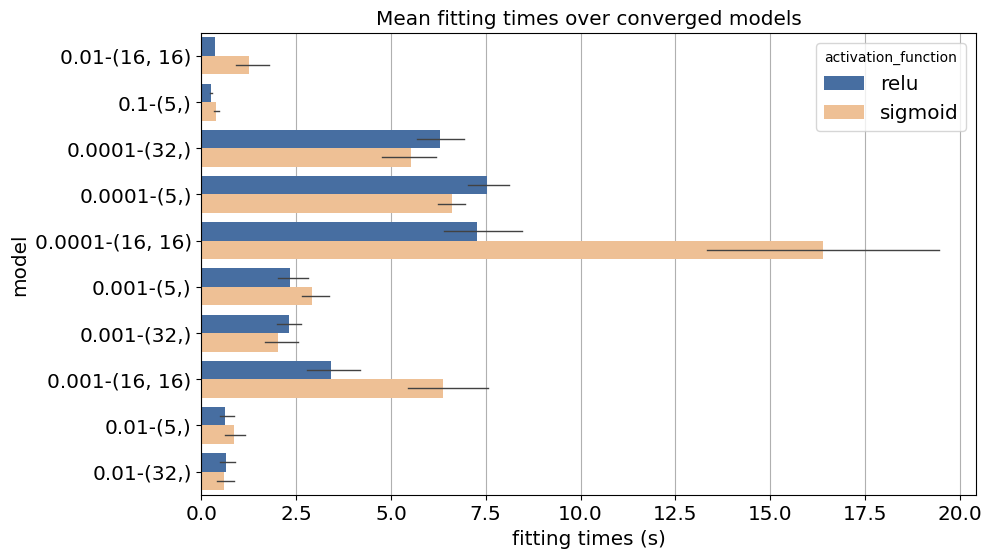

In [220]:
plt.rcParams['axes.axisbelow'] = True

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

_, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_fit_times[df_fit_times.num_models_converged == 2], y='model_short', x='metric_value', hue='activation_function', ax=ax, errwidth=1, palette=[color[3], color[2]])
yticklabels = [t.get_text().replace('MLP-', '') for t in ax.get_yticklabels()]
ax.set(title='Mean fitting times over converged models', xlabel='fitting times (s)', ylabel='model', yticklabels=yticklabels)
ax.grid(axis="x")

In [140]:
max_accuracies_models.model.unique()

array(['MLP-relu-0.01-(5,)', 'MLP-sigmoid-0.01-(5,)',
       'MLP-relu-0.001-(10, 5, 5)', 'MLP-sigmoid-0.01-(10, 5, 5)',
       'MLP-relu-0.001-(16, 8, 8)', 'MLP-sigmoid-0.01-(16, 8, 8)',
       'MLP-relu-0.001-(16, 16)', 'MLP-sigmoid-0.001-(16, 16)',
       'MLP-relu-0.001-(32,)', 'MLP-sigmoid-0.001-(32,)',
       'MLP-relu-0.0001-(64, 32, 32)', 'MLP-sigmoid-0.01-(64, 32, 32)'],
      dtype=object)

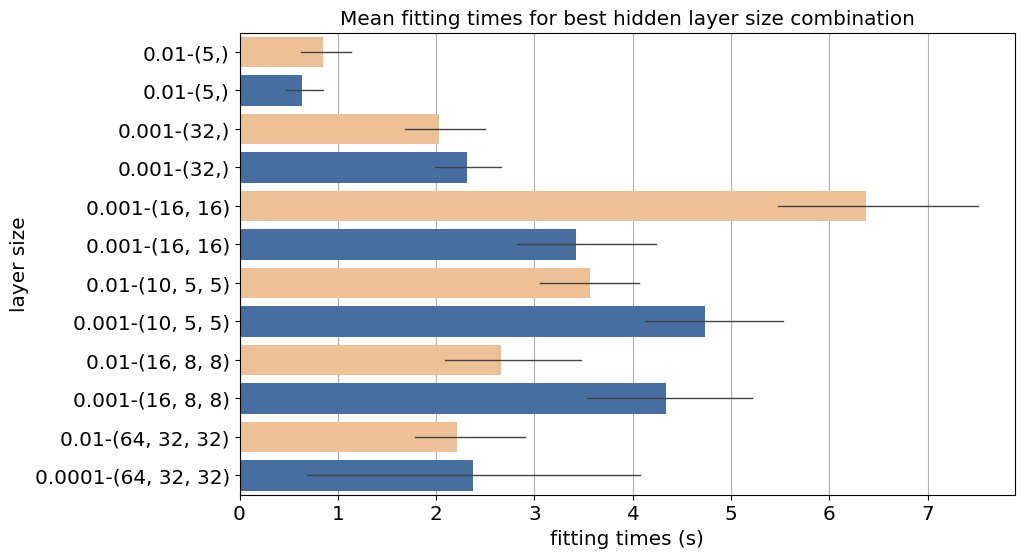

In [221]:
_, ax = plt.subplots(figsize=(10, 6))
df_fit_times_sorted = df_fit_times[df_fit_times.model.isin(max_accuracies_models.model.unique())].copy()
df_fit_times_sorted['s2'] = df_fit_times_sorted['activation_function'].apply(lambda x: 1 if x == 'sigmoid' else 2)
df_fit_times_sorted['s3'] = df_fit_times_sorted['hidden_layer_sizes'].apply(lambda x: x)
df_fit_times_sorted['s1'] = df_fit_times_sorted['hidden_layer_sizes'].apply(lambda x: len(x))
df_fit_times_sorted = df_fit_times_sorted.sort_values(by=['s1', 's3', 's2'])
colors = [color[2], color[3]] * 6
ax = sns.barplot(data=df_fit_times_sorted, y='model', x='metric_value', ax=ax, errwidth=1, palette = colors)
yticklabels = [t.get_text().replace('MLP-sigmoid-', '').replace('MLP-relu-', '') for t in ax.get_yticklabels()]
ax.set(title=f'Mean fitting times for best hidden layer size combination', xlabel='fitting times (s)', ylabel='layer size', yticklabels=yticklabels)
ax.grid(axis="x")

#### Performance

In [144]:
df_test_scores = get_specific_table(model_lists_melted_df, col='test_score', accuracy_threshold=accuracy_threshold)

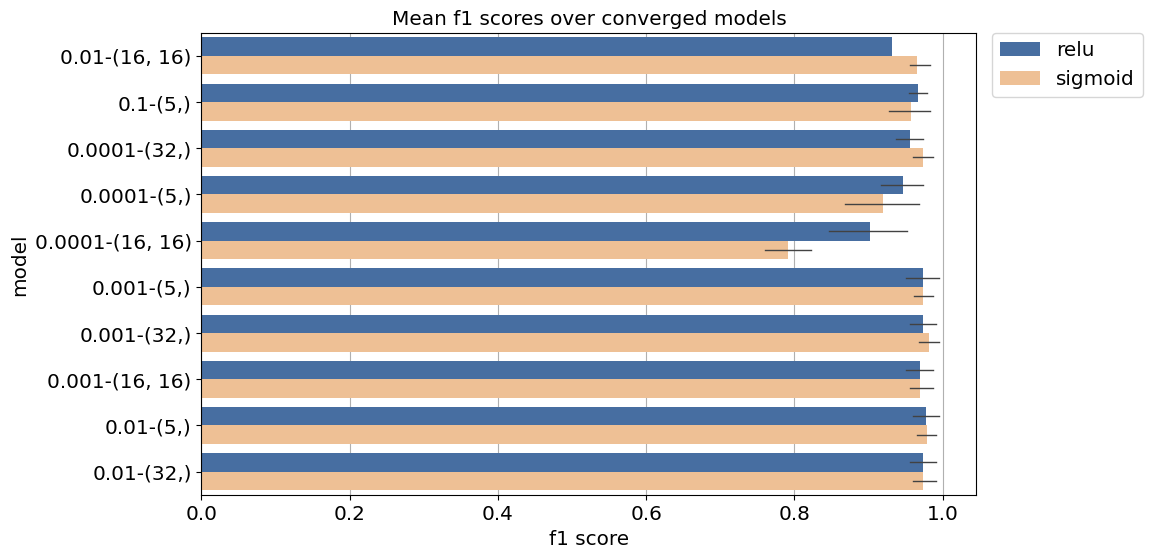

In [222]:
_, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_test_scores[df_test_scores.num_models_converged == 2], y='model_short', x='metric_value', hue='activation_function', ax=ax, errwidth=1, palette=[color[3], color[2]])
yticklabels = [t.get_text().replace('MLP-', '') for t in ax.get_yticklabels()]
ax.set(title='Mean f1 scores over converged models', xlabel='f1 score', ylabel='model', yticklabels=yticklabels)
ax.grid(axis="x")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

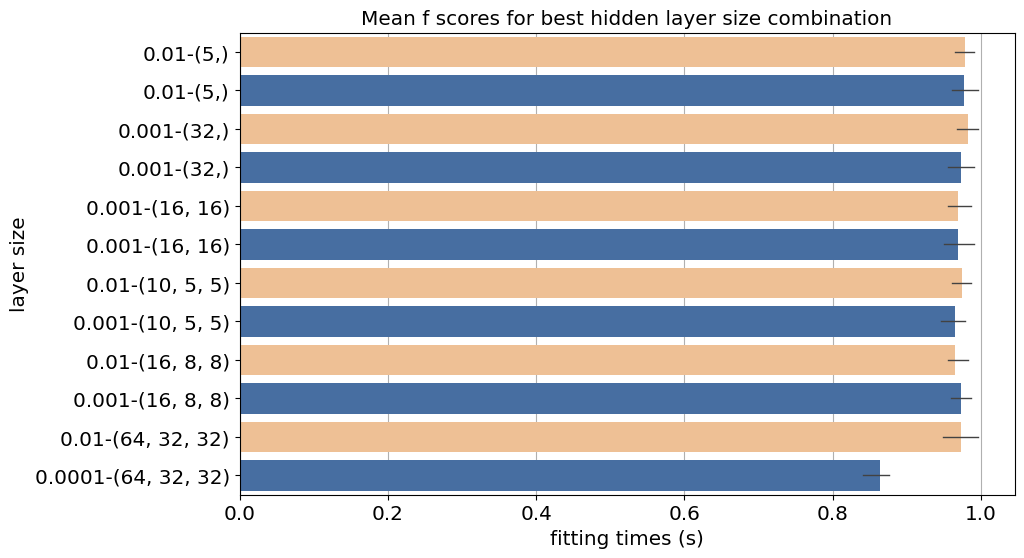

In [223]:
_, ax = plt.subplots(figsize=(10, 6))
df_test_scores_sorted = df_test_scores[df_test_scores.model.isin(max_accuracies_models.model.unique())].copy()
df_test_scores_sorted['s2'] = df_test_scores_sorted['activation_function'].apply(lambda x: 1 if x == 'sigmoid' else 2)
df_test_scores_sorted['s3'] = df_test_scores_sorted['hidden_layer_sizes'].apply(lambda x: x)
df_test_scores_sorted['s1'] = df_test_scores_sorted['hidden_layer_sizes'].apply(lambda x: len(x))
df_test_scores_sorted = df_test_scores_sorted.sort_values(by=['s1', 's3', 's2'])
colors = [color[2], color[3]] * 6
ax = sns.barplot(data=df_test_scores_sorted, y='model', x='metric_value', ax=ax, errwidth=1, palette = colors)
yticklabels = [t.get_text().replace('MLP-sigmoid-', '').replace('MLP-relu-', '') for t in ax.get_yticklabels()]
ax.set(title=f'Mean f scores for best hidden layer size combination', xlabel='fitting times (s)', ylabel='layer size', yticklabels=yticklabels)
ax.grid(axis="x")

#### Convergence and vanishing gradients

Looking at gradients where accuracy is bad although training was not interrupted:

In [149]:
model_lists_df[model_lists_df[f'vanishing_gradients'] > 0]

,model,test_score,fit_time,score_time,converged,validation_losses,training_losses,gradients,converged_num,diverged,...,validation_losses_cv3,validation_losses_cv4,vanishing_gradients_cv0,vanishing_gradients_cv1,vanishing_gradients_cv2,vanishing_gradients_cv3,vanishing_gradients_cv4,vanishing_gradients,all_converged,any_converged
32,"MLP-sigmoid-0.0001-(16, 16)","[0.76, 0.39024390243902435, 0.3902439024390243...","[13.324634552001953, 3.333043336868286, 4.3011...","[0.0030739307403564453, 0.004683971405029297, ...","[True, True, True, True, True]","[[0.6846944249628928, 0.68041004553801, 0.6764...","[[0.6897664991801756, 0.6857423199092404, 0.68...","[{0: [1.0408340855860842e-18, -5.2041704279304...",5,0,...,"[0.6904524339288072, 0.6859974816707222, 0.681...","[0.695168945110558, 0.6906579219713207, 0.6864...",False,True,True,True,False,3,True,True
33,"MLP-sigmoid-0.0001-(10, 5, 5)","[0.39759036144578314, 0.39024390243902435, 0.3...","[0.590977668762207, 0.6155796051025391, 0.5031...","[0.0048139095306396484, 0.0029921531677246094,...","[True, True, True, True, True]","[[0.665360557095163, 0.664856986537459, 0.6643...","[[0.669389231513787, 0.6689505808248375, 0.668...","[{0: [5.551115123125782e-19, -1.04083408558608...",5,0,...,"[0.6660143799953616, 0.6654715856369968, 0.664...","[0.6661892134315389, 0.6656454424550936, 0.665...",True,True,True,True,True,5,True,True
34,"MLP-sigmoid-0.0001-(16, 8, 8)","[0.39759036144578314, 0.39024390243902435, 0.3...","[2.3677468299865723, 2.79422664642334, 2.40829...","[0.004060268402099609, 0.0030362606048583984, ...","[True, True, True, True, True]","[[0.7072278380211776, 0.704826609156837, 0.702...","[[0.7062144791748886, 0.7039923883672555, 0.70...","[{0: [-1.4311468676808658e-18, 8.4567769453869...",5,0,...,"[0.706704565922092, 0.7042237285465667, 0.7018...","[0.7070524321627435, 0.704577168767646, 0.7022...",True,True,True,True,True,5,True,True
35,"MLP-sigmoid-0.0001-(64, 32, 32)","[0.39759036144578314, 0.39024390243902435, 0.3...","[1.8049182891845703, 1.891944408416748, 2.2805...","[0.003992319107055664, 0.0033380985260009766, ...","[True, True, True, True, True]","[[0.7025572764811245, 0.6948739024060192, 0.68...","[[0.7210845882166167, 0.7126230487451936, 0.70...","[{0: [-1.1167282376600696e-18, 1.4853569763051...",5,0,...,"[0.7070232050882079, 0.6995576649009283, 0.693...","[0.70536412777116, 0.6978649743653895, 0.69132...",True,True,True,True,True,5,True,True
39,"MLP-sigmoid-0.001-(10, 5, 5)","[0.39759036144578314, 0.39024390243902435, 0.3...","[0.8025007247924805, 0.9098875522613525, 1.103...","[0.004088401794433594, 0.0031833648681640625, ...","[True, True, True, True, True]","[[0.6612898272776057, 0.6579077700351847, 0.65...","[[0.6658723700338122, 0.6630134247707815, 0.66...","[{0: [-3.226585665316861e-18, 5.89805981832114...",5,0,...,"[0.6616602445700919, 0.6580794399779766, 0.655...","[0.6618267338335757, 0.6582367708632013, 0.655...",True,True,True,True,True,5,True,True
40,"MLP-sigmoid-0.001-(16, 8, 8)","[0.39759036144578314, 0.39024390243902435, 0.3...","[1.5584259033203125, 0.976189136505127, 1.4186...","[0.0030059814453125, 0.003378629684448242, 0.0...","[True, True, True, True, True]","[[0.6887285072415693, 0.6749584658515791, 0.66...","[[0.6891988993043509, 0.6767463707952908, 0.66...","[{0: [-1.0842021724855044e-18, 1.3010426069826...",5,0,...,"[0.6877059429136898, 0.6737077104057319, 0.664...","[0.688093104436393, 0.6741178839526063, 0.6649...",True,True,True,True,True,5,True,True
57,"MLP-sigmoid-0.5-(10, 5, 5)","[0.39759036144578314, 0.39024390243902435, 0.3...","[0.5155467987060547, 0.5394723415374756, 0.660...","[0.003244161605834961, 0.003988027572631836, 0...","[True, True, True, True, True]","[[1.1057403195871907, 1.1908419858294979, 1.19...","[[1.143532122787749, 1.2321828707975788, 1.240...","[{0: [-4.531965080989411e-19, -1.7195446455620...",5,0,...,"[1.1142079723773872, 1.192218892205877, 1.1998...","[1.1124667970285809, 1.191237473613468, 1.1992...",True,T

In [212]:
g_id = 58
i = 4 #i=4 vanishing  gradient issue i=0 normal behavior
gradients = model_lists_df.loc[g_id, 'gradients'][i]
f1 = model_lists_df.loc[g_id,f'test_score_cv{i}']

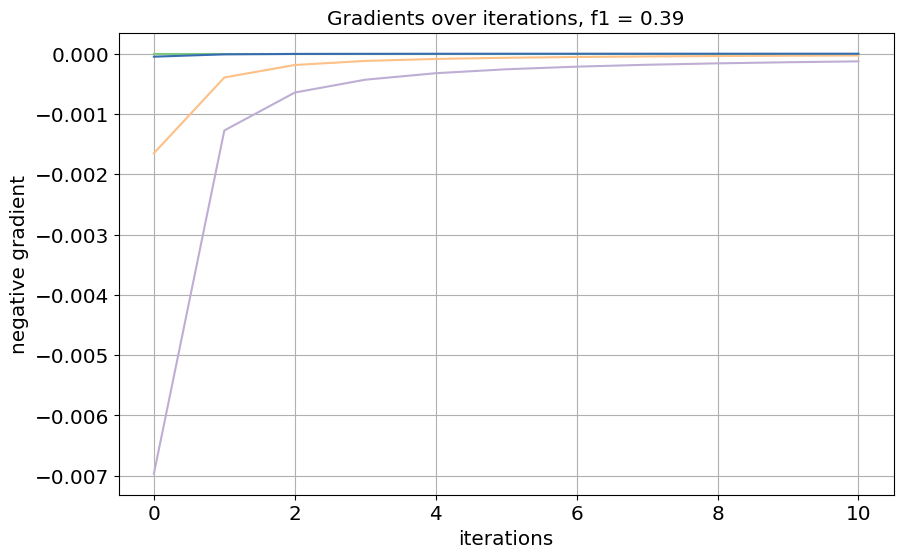

In [213]:
_, ax = plt.subplots(figsize=(10, 6))
for j, grad in gradients.items():
    ax = sns.lineplot(x=range(len(grad)), y=grad, color=color[j])
ax.set(title=f'Gradients over iterations, f1 = {f1:.2}', xlabel='iterations', ylabel='gradient')
ax.grid()

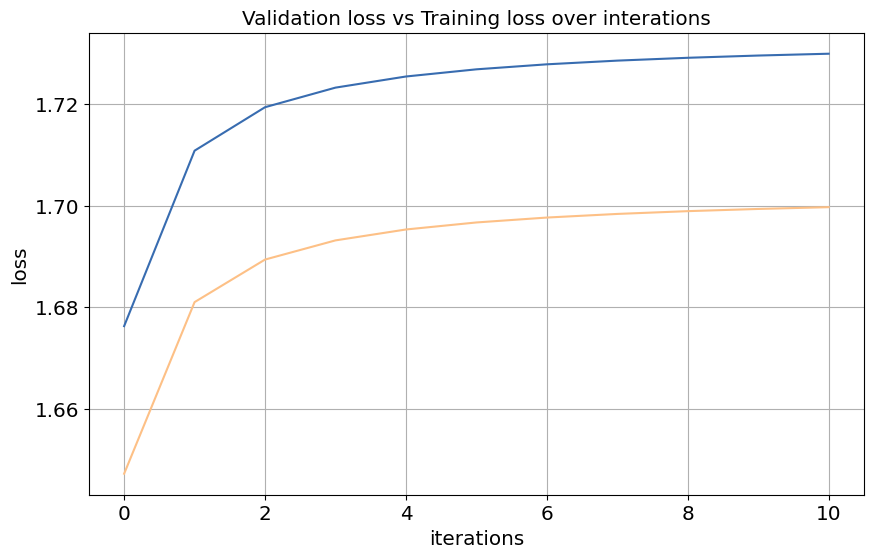

In [214]:
_, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(len(model_lists_df.loc[g_id, f'validation_losses_cv{i}'])), y=model_lists_df.loc[g_id, f'validation_losses_cv{i}'], color=color[2])
sns.lineplot(x=range(len(model_lists_df.loc[g_id, f'training_losses_cv{i}'])), y=model_lists_df.loc[g_id, f'training_losses_cv{i}'], color=color[3])
ax.set(title=f'Validation loss vs Training loss over interations', xlabel='iterations', ylabel='loss')
ax.grid()

In [215]:
g_id = 58
i = 0 #i=4 vanishing  gradient issue i=0 normal behavior
gradients = model_lists_df.loc[g_id, 'gradients'][i]
f1 = model_lists_df.loc[g_id,f'test_score_cv{i}']

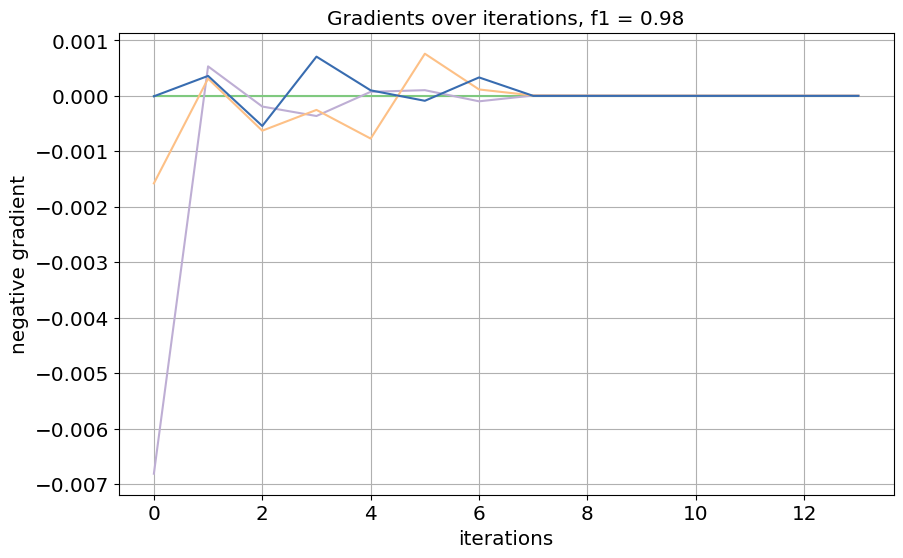

In [216]:
_, ax = plt.subplots(figsize=(10, 6))
for j, grad in gradients.items():
    ax = sns.lineplot(x=range(len(grad)), y=grad, color=color[j])
ax.set(title=f'Gradients over iterations, f1 = {f1:.2}', xlabel='iterations', ylabel='gradient')
ax.grid()

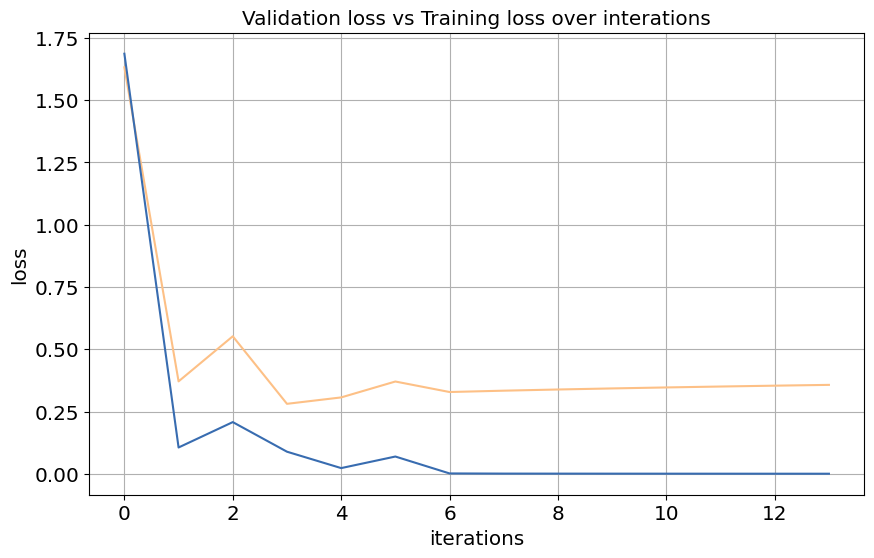

In [217]:
_, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(len(model_lists_df.loc[g_id, f'validation_losses_cv{i}'])), y=model_lists_df.loc[g_id, f'validation_losses_cv{i}'], color=color[2])
sns.lineplot(x=range(len(model_lists_df.loc[g_id, f'training_losses_cv{i}'])), y=model_lists_df.loc[g_id, f'training_losses_cv{i}'], color=color[3])
ax.set(title=f'Validation loss vs Training loss over interations', xlabel='iterations', ylabel='loss')
ax.grid()

/tmp/ipykernel_8052/560291286.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  failure_count = model_lists_df.groupby(['learning_rate'])['diverged', 'vanishing_gradients'].sum() / (12 * 5)


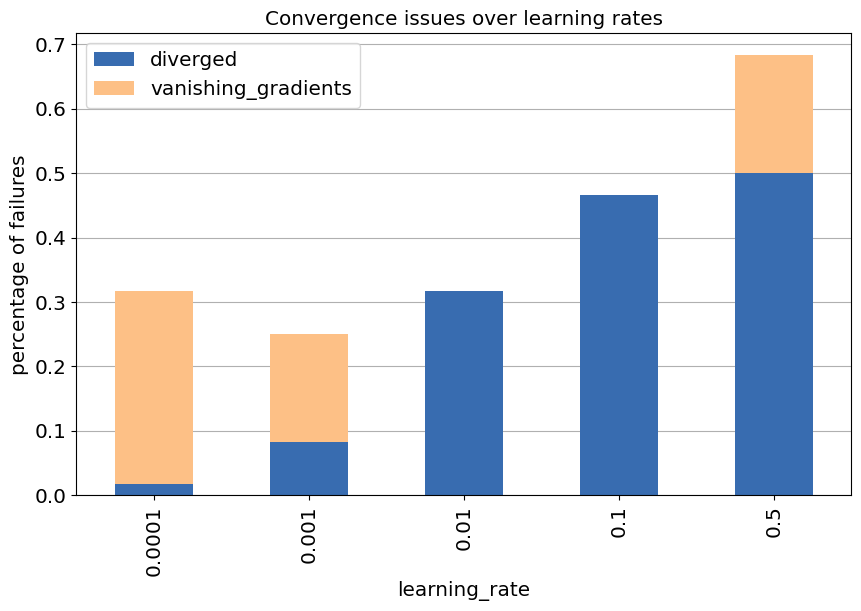

In [199]:
_, ax = plt.subplots(figsize=(10, 6))
failure_count = model_lists_df.groupby(['learning_rate'])['diverged', 'vanishing_gradients'].sum() / (12 * 5)
failure_count.plot(ax = ax, kind='bar', stacked=True, cmap=cmap)
ax.set(title=f'Convergence issues over learning rates', ylabel='percentage of failures')
ax.grid(axis='y')

In [200]:
def get_failure_df(model_lists_df, by_col='hidden_layer_sizes'):
    failure_count = model_lists_df.groupby([by_col])['diverged', 'vanishing_gradients'].sum() / (12 * 5)
    failure_count = failure_count.reset_index(drop=False)
    failure_count['layer_size_len'] = failure_count[by_col].apply(lambda x: len(x))
    failure_count = failure_count.sort_values(by='layer_size_len')
    failure_count = failure_count.drop('layer_size_len', axis=1)
    failure_count = failure_count.set_index(by_col)
    return failure_count

/tmp/ipykernel_8052/3839886018.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  failure_count = model_lists_df.groupby([by_col])['diverged', 'vanishing_gradients'].sum() / (12 * 5)


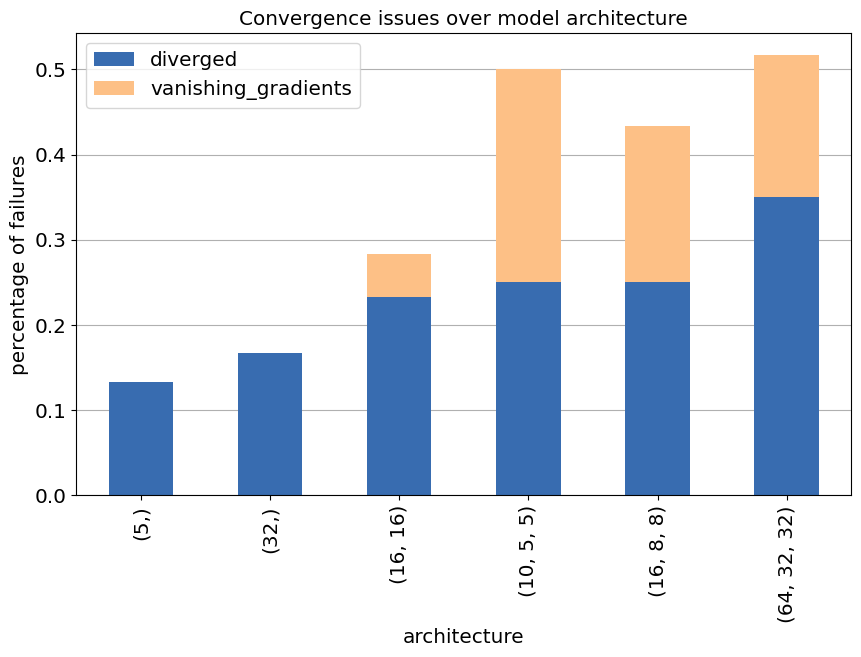

In [234]:
_, ax = plt.subplots(figsize=(10, 6))
failure_count = get_failure_df(model_lists_df, by_col='hidden_layer_sizes')
failure_count.plot(ax = ax, kind='bar', stacked=True, colormap=cmap)
ax.set(title=f'Convergence issues over model architecture', ylabel='percentage of failures', xlabel='architecture')
ax.grid(axis='y')